# MAXI LC K-Means Clustering

## Loading data and plotting it
Read soft and hard counts per second from *MAXI* observation and then calculate ratio $R = \frac{\text{2-4 keV}}{\text{4-20 keV}}$ with appropriate error adding

In [1]:
import numpy as np

# Load the data from the .dat file
ratio_data = np.loadtxt("data\\maxi\\j1820+070\j1820p070_ratio_gsclc.dat")
soft_flux_data = np.loadtxt("data\\maxi\\j1820+070\\j1820p070_2.0-4.0keV_gsclc.dat")
hard_flux_data = np.loadtxt("data\\maxi\\j1820+070\\j1820p070_4.0-20.0keV_gsclc.dat")
dates=[]

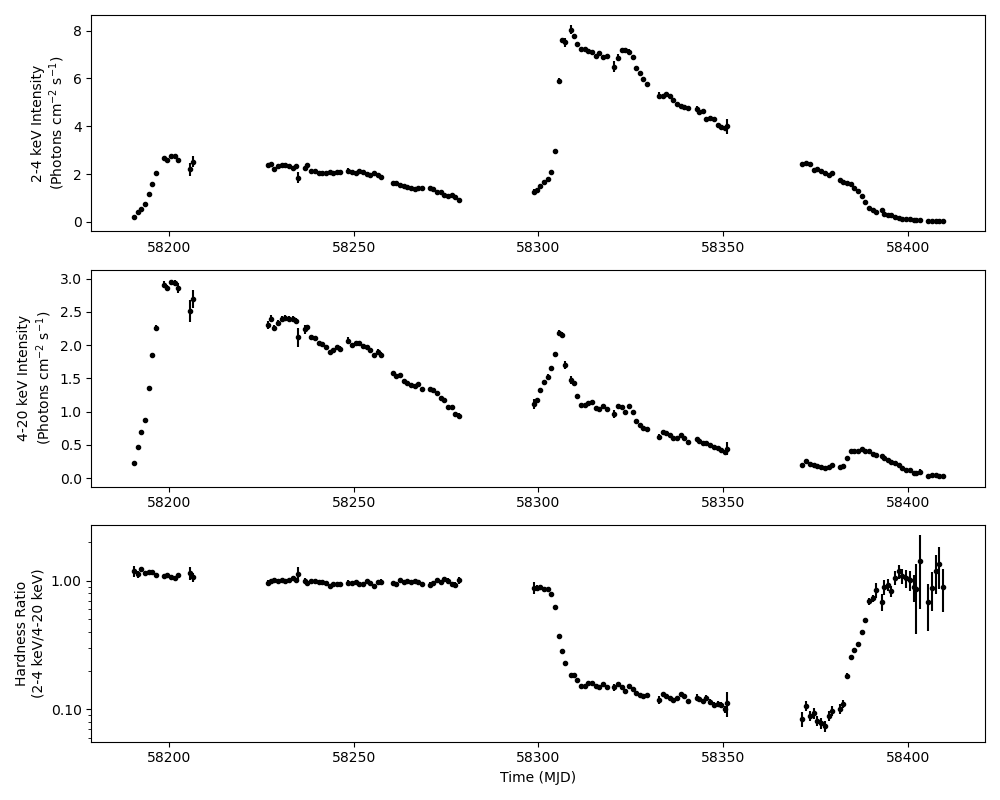

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib widget

def plot_hd(t_mjd,t_mjd_err,cts_per_s_soft,cts_per_s_soft_err,cts_per_s_hard,cts_per_s_hard_err,ratio,ratio_err):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,8))
    ax1.errorbar(t_mjd,cts_per_s_soft, xerr=t_mjd_err, yerr=cts_per_s_soft_err, fmt='k.')
    ax1.set_ylabel("2-4 keV Intensity\n(Photons cm$^{-2}$ s$^{-1}$)")
    ax2.errorbar(t_mjd,cts_per_s_hard, xerr=t_mjd_err, yerr=cts_per_s_hard_err, fmt='k.')
    ax2.set_ylabel("4-20 keV Intensity\n(Photons cm$^{-2}$ s$^{-1}$)")
    ax3.errorbar(t_mjd,ratio, xerr=t_mjd_err, yerr=ratio_err, fmt='k.')
    ax3.set_ylabel("Hardness Ratio\n(2-4 keV/4-20 keV)")
    ax3.set_xlabel("Time (MJD)")

    #ax3.set_ylim(0.001,10)
    ax3.set_yscale('log')
    # ax1.set_title("J1820+070 (MAXI)")
    plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
    plt.ticklabel_format(style='plain',useOffset=False,axis='y')
    plt.tight_layout()
    plt.show()

# Split the data into separate arrays
date_lower_bound = ratio_data[:, 0]
date_upper_bound = ratio_data[:, 1]
ratio = ratio_data[:, 2]
ratio_error = ratio_data[:, 3]

#Load fluxes
flux_soft = soft_flux_data[:, 2]
flux_soft_error = soft_flux_data[:, 3]
flux_hard = hard_flux_data[:, 2]
flux_hard_error = hard_flux_data[:, 3]

# Calculate the average date and date error
date = (date_lower_bound + date_upper_bound) / 2
date_error = (date_upper_bound - date_lower_bound) / 2

# Calculate the total flux and total flux error
total_flux = flux_soft + flux_hard
total_flux_error = np.sqrt(flux_soft_error**2 + flux_hard_error**2)

#Only show between specific dates
if len(dates) > 0:
    print('Showing only observations between MJDs: ',dates[0],' and ',dates[1])
    date_index , = np.where((date >= int(dates[0])) & (date <= int(dates[1])))
    date = np.take(date,date_index)
    date_error = np.take(date_error,date_index)
    flux_soft = np.take(flux_soft,date_index)
    flux_soft_error = np.take(flux_soft_error,date_index)
    flux_hard = np.take(flux_hard,date_index)
    flux_hard_error = np.take(flux_hard_error,date_index)
    total_flux = np.take(total_flux,date_index)
    total_flux_error = np.take(total_flux_error,date_index)
    ratio = np.take(ratio,date_index)
    ratio_error = np.take(ratio_error,date_index)

# Create a mask for rows where the ratio is not negative
mask = ratio >= 0

# Apply the mask to each array
date = date[mask]
date_error = date_error[mask]
ratio = ratio[mask]
ratio_error = ratio_error[mask]
flux_soft = flux_soft[mask]
flux_soft_error = flux_soft_error[mask]
flux_hard = flux_hard[mask]
flux_hard_error = flux_hard_error[mask]
total_flux = total_flux[mask]
total_flux_error = total_flux_error[mask]

# Create a mask for rows where the ratio larger than ratio error
mask = ratio > ratio_error

# Apply the mask to each array
date = date[mask]
date_error = date_error[mask]
ratio = ratio[mask]
ratio_error = ratio_error[mask]
flux_soft = flux_soft[mask]
flux_soft_error = flux_soft_error[mask]
flux_hard = flux_hard[mask]
flux_hard_error = flux_hard_error[mask]
total_flux = total_flux[mask]
total_flux_error = total_flux_error[mask]

#Plot
plot_hd(date,date_error,flux_soft,total_flux_error,flux_hard,flux_hard_error,ratio,ratio_error)

## Standardize data and perform PCA EVR analysis

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Combine into a single dataset
data = np.vstack((np.log(ratio), total_flux)).T

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

pca = PCA()
pca.fit_transform(data)
print(pca.explained_variance_ratio_)

[0.73362619 0.26637381]


## Perform k-mean clustering and plot classified data

[2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[ 0.78858093  0.00369939]
 [-1.41240368  0.02701921]
 [ 0.66373433 -1.24666855]
 [-1.02853774  1.7208397 ]]


c:\Users\ysabd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ysabd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


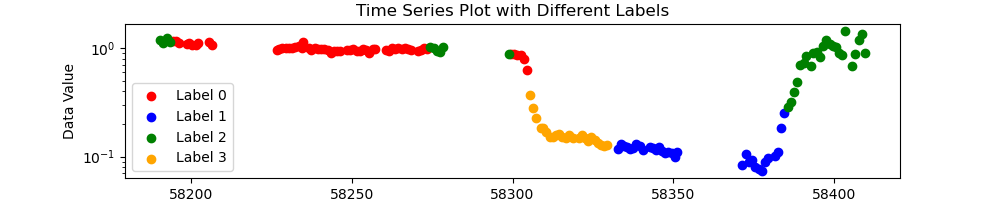

In [4]:
%matplotlib widget
# Use a clustering algorithm to cluster the encoded data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)  # Choose the appropriate number of clusters
clusters = kmeans.fit_predict(data)

# Assign colors to each label
label_colors = ['red', 'blue', 'green', 'orange','purple','cyan','yellow']

# Create the plot
fig, ax = plt.subplots(figsize=(10,2))

# Iterate over the unique labels
for label in np.unique(clusters):
    mask = clusters == label
    ax.scatter(date[mask], ratio[mask], color=label_colors[label], label=f'Label {label}')

ax.set_xlabel('Time')
ax.set_ylabel('Data Value')
ax.set_title('Time Series Plot with Different Labels')
ax.set_yscale('log')
ax.legend()

plt.show()

### Clustered HID 

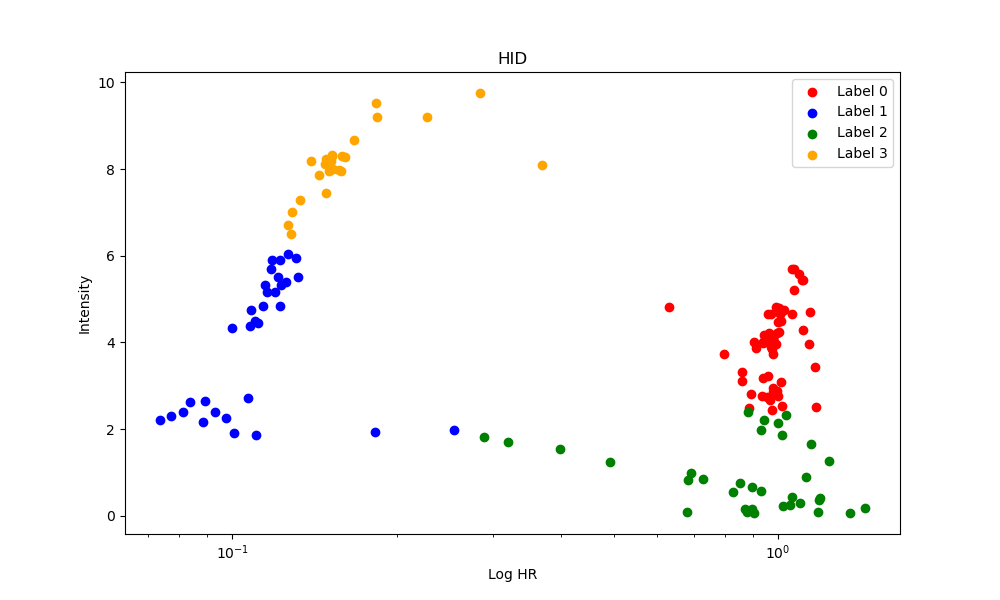

In [5]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over the unique labels
for label in np.unique(clusters):
    mask = clusters == label
    ax.scatter(ratio[mask],total_flux[mask], color=label_colors[label], label=f'Label {label}')
    
# texts = []
# for i in range(len(ratio)):
#      texts.append(plt.text(ratio[i], count_rate.tolist()[i], str(round(t_mjd[i], 2)), fontsize=6))

# from adjustText import adjust_text
# # adjust text positions
# adjust_text(texts)

ax.set_xlabel('Log HR')
ax.set_ylabel('Intensity')
ax.set_title('HID')
ax.set_xscale('log')
ax.legend()

plt.show()

### Un-clustered Normal HID

(150,)
(150,)
(150,)


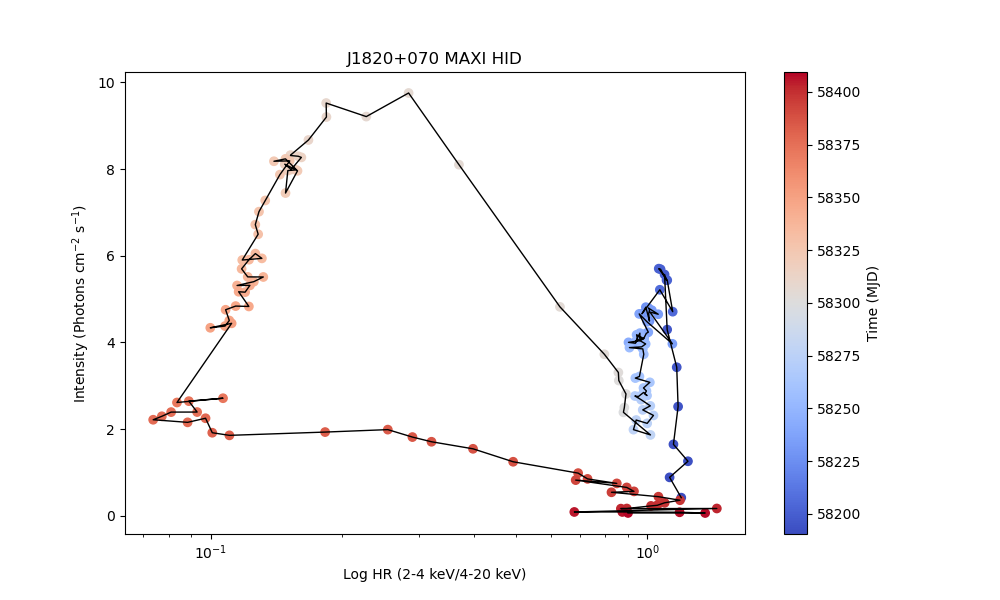

In [6]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over the unique labels
plt.scatter(ratio,total_flux, c=date, cmap=plt.cm.coolwarm)
plt.plot(ratio, total_flux,'k',linewidth=1)

plt.xlabel('Log HR (2-4 keV/4-20 keV)')
plt.ylabel('Intensity (Photons cm$^{-2}$ s$^{-1}$)')
plt.title('J1820+070 MAXI HID')
plt.xscale('log')
# plt.legend()
plt.colorbar(label="Time (MJD)")

plt.show()